In [18]:
## Imports and settings
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

import PIL
from PIL import ImageEnhance
from skimage import measure, filters
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
from skimage.exposure import rescale_intensity, equalize_adapthist, is_low_contrast
from skimage.morphology import opening
from skimage.segmentation import clear_border
from skimage import exposure
from skimage import filters

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square, disk
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.external import tifffile
from skimage.feature import blob_log, blob_dog, blob_doh

import os
import math

image_file = '/Users/Nicke/Desktop/hackthedinos/pteradata/ct_data/Zanabazar/8-Bit/TROODON/SLICES/CORONAL/COR530.TIF'
# image_file = '/Users/Nicke/Desktop/hackthedinos/pteradata/ct_data/Chordeiles/16bitrot/chor0232.tif'

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


False
(399, 392)


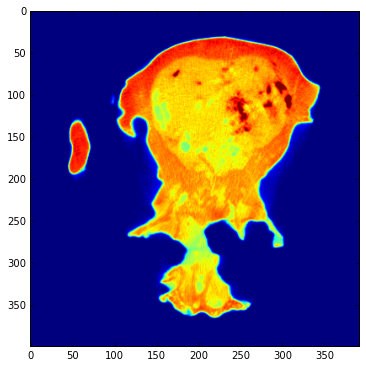

In [12]:
## Import Image
# img = PIL.Image.open(image_file)
# img.show()
# img_arr = np.array(img)

img_arr = tifffile.imread(image_file)
img_org = img_arr.copy()
plt.figure(figsize=(6,6))
plt.imshow(img_arr)
print is_low_contrast(img_arr)
print img_arr.shape

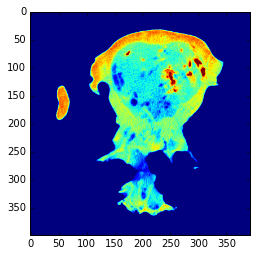

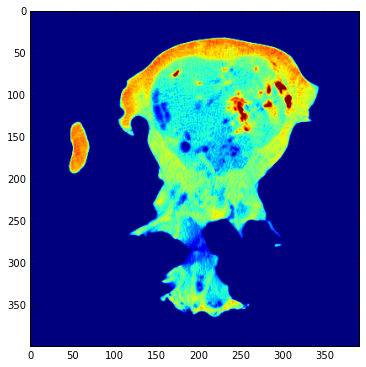

In [13]:
# ## Improve contrast
# contrast_iterations = 1
# for i in range(contrast_iterations):
#     v_min, v_max = np.percentile(img_arr, (80, 100))
#     img_arr = rescale_intensity(img_arr, in_range=(v_min, v_max))

# Improve contrast
contrast_iterations = 3
for i in range(contrast_iterations):
    img_arr = np.clip(img_arr, 50, 255)
    img_arr = rescale_intensity(img_arr)

# ## Improve contrast
# img_arr = exposure.equalize_hist(img_arr)

# ##Imporve Contrast
# img_arr = equalize_adapthist(img_arr)

plt.figure(figsize=(6,6))
plt.imshow(img_arr)

(array([ 113127.,    1614.,    3138.,    9097.,   12509.,    7746.,
           4225.,    4036.,     527.,     389.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

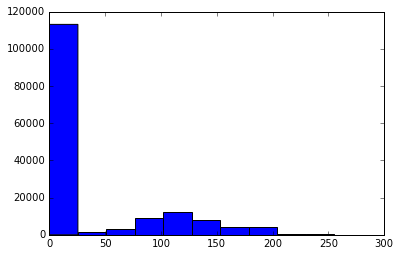

In [14]:
plt.hist(img_arr.ravel())

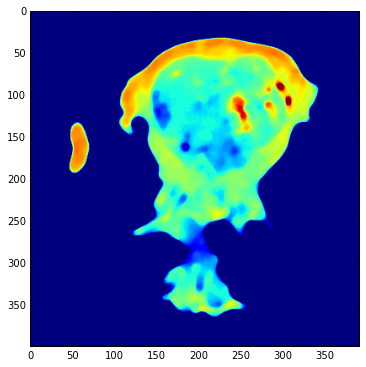

In [15]:
img_arr = filters.rank.median(img_arr, disk(5))
plt.figure(figsize=(6,6))
plt.imshow(img_arr)

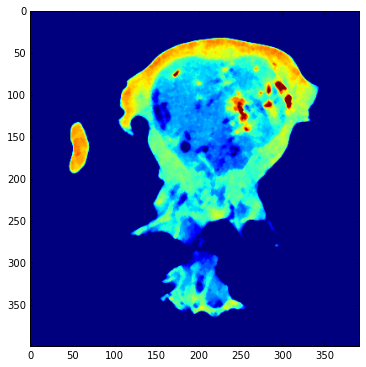

In [20]:
# apply threshold
thresh = threshold_otsu(img_arr)
img_arr = np.clip(img_arr, thresh, img_arr.max())
plt.figure(figsize=(6,6))
plt.imshow(img_arr)

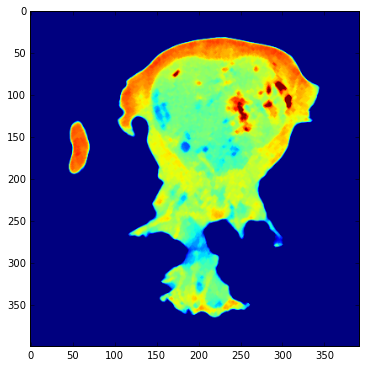

In [19]:
## Morphology operations
img_arr = opening(img_arr)
img_arr = closing(img_arr)
plt.figure(figsize=(6,6))
plt.imshow(img_arr)

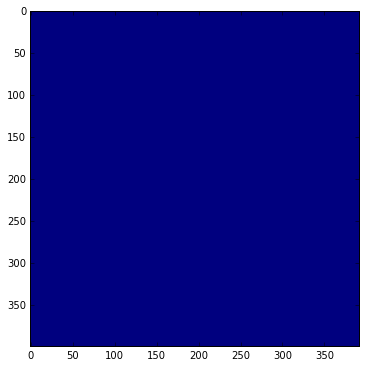

In [11]:
img_arr = clear_border(img_arr, buffer_size=10)
plt.figure(figsize=(6,6))
plt.imshow(img_arr)

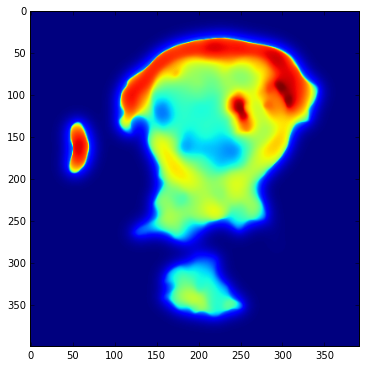

In [22]:
## Denoise image
# img_arr = filters.restoration.denoise_bilateral(img_arr)
denoise_weight = 1
img_arr = denoise_tv_chambolle(img_arr, weight=denoise_weight)
plt.figure(figsize=(6,6))
plt.imshow(img_arr)

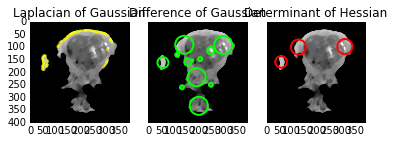

In [23]:
## Find blobs
blobs_log = blob_log(img_arr, max_sigma=30, num_sigma=10, threshold=.1)
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(img_arr, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(img_arr, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)


fig,axes = plt.subplots(1, 3, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
axes = axes.ravel()
for blobs, color, title in sequence:
    ax = axes[0]
    axes = axes[1:]
    ax.set_title(title)
    ax.imshow(img_arr, interpolation='nearest', cmap=plt.cm.gray)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax.add_patch(c)

plt.show()

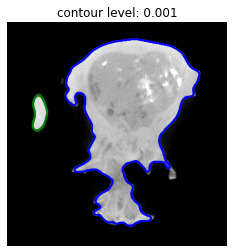

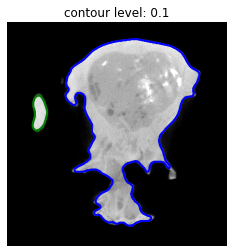

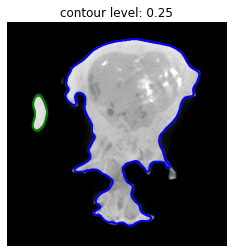

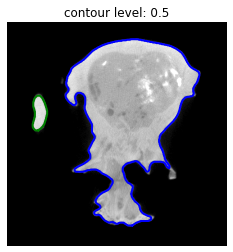

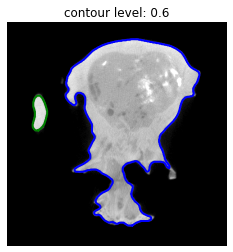

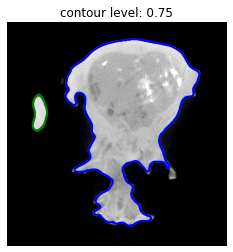

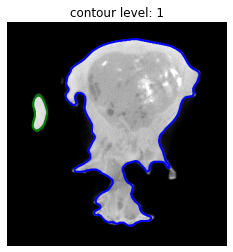

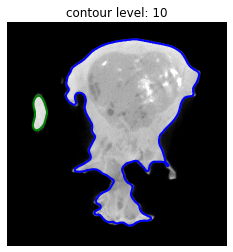

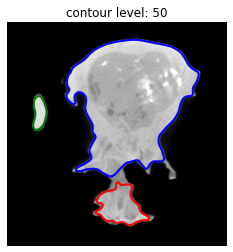

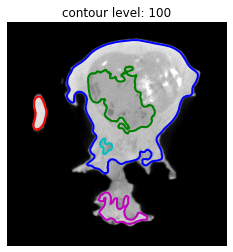

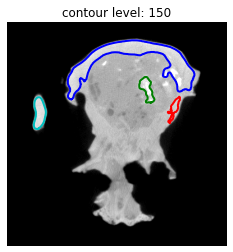

In [16]:
## Find contours
contour_levels = [.001, .1, .25, .5, .6, .75, 1, 10, 50, 100, 150]
# contour_level = .1 #Argument to find_contours
contour_thresh = 100 #Threshold to throw out contours shorter than thresh

for contour_level in contour_levels:
    contours = measure.find_contours(img_arr, contour_level)
    

    large_contours = [x for x in contours if len(x) > contour_thresh]

    # Display the image and plot all contours found
    fig, ax = plt.subplots()
    ax.imshow(img_org, cmap=plt.cm.gray)

    for n, contour in enumerate(large_contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title('contour level: '+str(contour_level))
    plt.show()